In [1]:
import numpy as np
import scipy.misc
import imageio
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
H = 128
W = 128

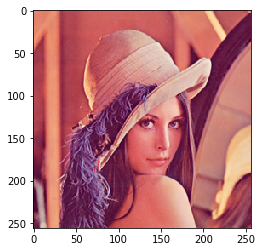

In [3]:
# pillow(PIL)で画像を読み込むようにする
bmp = Image.open("Lenna.bmp")
plt.imshow(bmp)

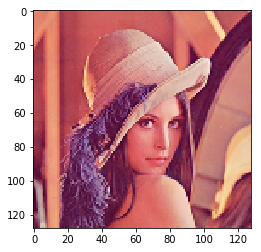

In [4]:
# リサイズする
lenna = np.array(bmp.resize((H, W)))
plt.imshow(lenna)

In [5]:
# 2次元でのDCTを実行
lenna_F = dct(dct(lenna, axis = 0, norm='ortho'), axis = 1, norm='ortho')

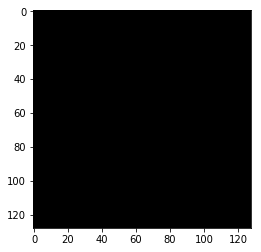

In [6]:
# 0で初期化したnumpy配列を作成
canvas = np.zeros((H , *(W, 3)))
# canvas

plt.imshow(canvas)

In [7]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

bases = []
images = []
for h in range(H):
    for w in range(W):
        a = np.zeros((H, W))
        a[h, w] = 1
        base = idct(idct(a, axis=0), axis=1)
        canvas[:,:,0] += lenna_F[h, w, 0] * base
        canvas[:,:,1] += lenna_F[h, w, 1] * base
        canvas[:,:,2] += lenna_F[h, w, 2] * base
        
    result = np.zeros((H , *(W, 3)))
    result[:,:,0] = min_max(canvas[:,:,0])
    result[:,:,1] = min_max(canvas[:,:,1])
    result[:,:,2] = min_max(canvas[:,:,2])
    plt.imsave("data/lenna-%04d.png" % (h*64+w), result)